<a href="https://colab.research.google.com/github/DesiPilla/MLTSA_DPilla/blob/master/HW4/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import pylab as plt
import numpy as np
from scipy.stats import shapiro
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
! pip install pydlm
from pydlm import dlm, trend, seasonality, dynamic

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=58997 sha256=2c9015820641aa74b3a32b34b20597a7dac76dbc00005142a911bc4bb519618b
  Stored in directory: /root/.cache/pip/wheels/69/d3/ca/f5a7bc0976a2779bf87c20f82a9adece40616ee3b9d39bf410
Successfully built pydlm


# Data acquisition and pre-processing

## CO2

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/My\ Drive

/content/drive/My Drive


In [5]:
cd mltsa

/content/drive/My Drive/mltsa


acquire the Co2 emission data from the world bank. save it on your drive and read it in
The file should be called API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv and should be store on your google drive in MLTSA/data.

Choose the "world" row and transpose the file so that it has one column, world, which you should rename "co2", and N rows for N years. Make sure the years are readin as datetime data type (you can use pd.to_datetime(... format="%Y") 


In [6]:
!ls

API_EN.ATM.CO2E.PC_DS2_en_csv_v2_821708.csv


In [0]:
co2 = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_821708.csv', skiprows=4)

In [8]:
co2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,193.000000,194.000000,196.000000,197.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,205.000000,206.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,215.000000,217.000000,241.000000,241.000000,242.000000,243.000000,243.000000,244.000000,245.000000,245.000000,245.000000,245.000000,246.000000,246.000000,246.000000,247.000000,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,251.000000,251.000000,250.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.037282,2.150171,2.241690,2.753812,2.916141,3.035673,3.049316,3.116120,3.315619,3.927816,4.204099,4.427336,4.494008,4.812818,4.507408,4.377664,4.368837,4.499300,4.526618,4.577355,4.475246,4.003176,3.883912,3.735079,3.833816,3.927593,3.913394,3.950233,4.084677,4.219883,4.087860,4.125632,4.482813,4.505842,4.428009,4.478244,4.496961,4.495002,4.485427,4.453672,4.583647,4.637700,4.605110,4.737570,4.784463,4.826155,4.901256,4.930568,4.935583,4.721868,4.847677,4.811059,4.955428,4.872777,4.886320,NaN,NaN,NaN,NaN,NaN,NaN
std,4.184849,4.377180,4.717044,8.443484,8.493180,8.706497,8.062852,7.263779,7.187105,9.921855,9.263233,9.886576,10.141886,10.766220,9.198437,8.467537,8.085626,8.012298,8.069064,7.968325,7.429310,6.211035,5.797967,5.297735,5.576488,5.617238,5.537729,5.336876,5.485957,5.738058,5.639184,5.694542,6.025123,6.347220,6.247433,6.392206,6.252384,6.563317,6.179797,5.966715,6.380133,6.535791,6.335804,6.387948,6.304327,6.408915,6.528367,6.353846,6.134005,5.811829,5.858565,5.786095,6.155163,5.840759,6.068998,NaN,NaN,NaN,NaN,NaN,NaN
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,0.023982,0.010720,0.013268,0.013966,0.015142,0.015693,0.017195,0.019060,0.019350,0.020034,0.017282,0.017264,0.018603,0.019182,0.022595,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.183316,0.180620,0.198531,0.199338,0.214492,0.233321,0.242972,0.251838,0.280633,0.320451,0.349795,0.340798,0.355732,0.368516,0.371617,0.380724,0.362854,0.387947,0.401433,0.438602,0.448290,0.466774,0.453681,0.450120,0.475806,0.473886,0.441159,0.483382,0.500122,0.497808,0.457140,0.440831,0.569229,0.528187,0.568108,0.587897,0.620413,0.678608,0.675733,0.726635,0.742181,0.757221,0.755792,0.783483,0.828754,0.859606,0.808379,0.898907,0.816057,0.827852,0.815799,0.832929,0.836163,0.866682,0.880427,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.612271,0.636830,0.654542,0.640002,0.765958,0.695949,0.750375,0.802935,1.004495,1.056845,1.000292,1.103881,1.111408,1.136338,1.233332,1.285485,1.361852,1.412222,1.518657,1.580338,1.528621,1.581525,1.479083,1.365647,1.447949,1.540763,1.588908,1.637335,1.755377,1.641918,1.678107,1.864979,2.295183,2.286818,2.229188,2.326499,2.411662,2.282605,2.256440,2.268336,2.344271,2.540171,2.544182,2.644354,2.672370,2.757264,2.929917,2.823702,3.029991,2.939359,2.935527,2.951649,3.027053,3.042065,3.091317,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.694988,1.726250,1.939525,1.710527,1.998806,2.190061,2.455830,2.923741,3.257972,3.597430,4.014685,4.502778,4.525627,5.223770,4.664393,4.898802,5.173553,5.322942,5.746698,5.496695,5.492031,5.307244,5.376697,5.408734,5.273742,5.573662,4.977945,5.386307,5.796251,5.837883,5.914871,5.988953,6.471896,6.655498,6.446692,6.477661,6.758176,6.576799,6.553864,6.696470,6.603843,6.938325,6.956241,7.251943,7.142759,7.037947,7.052989,6.9167

In [9]:
co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868319,7.235198,10.026179,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.050481,0.038410,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
co2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

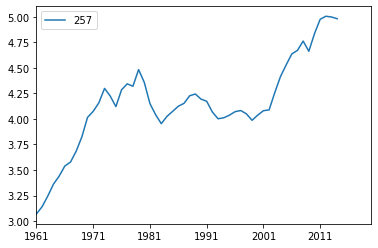

In [11]:
co2[co2["Country Name"] ==  "World"].T.iloc[5:].plot();

In [0]:
co2 = co2[co2["Country Name"] ==  "World"].T.iloc[5:-1]

In [13]:
co2.head()

,257
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005


In [14]:
co2.index = pd.to_datetime(co2.index, format="%Y")
co2.rename(columns={257:'co2'}, inplace=True)
co2.index

DatetimeIndex(['1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
      

In [15]:
#leave 
co2.head()

,co2
1961-01-01,3.07002
1962-01-01,3.14096
1963-01-01,3.24511
1964-01-01,3.36138
1965-01-01,3.44005


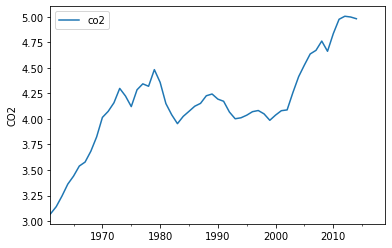

In [16]:
#leave 
co2.plot()
plt.ylabel("CO2"); 

**Figure 1:** This is a plot of the CO2 emissions in metric tons per capita of the globe from 1961 to 2019. The total emissions has risen over time.

 standardize the data by subtracting by the mean **over the time period 1960-2003** (which is the period that you will use) and dividing by the stdev over the same period

In [0]:
co2.co2 = (co2 - co2.iloc[:-16, 0].mean()) / co2.iloc[:-16, 0].std()

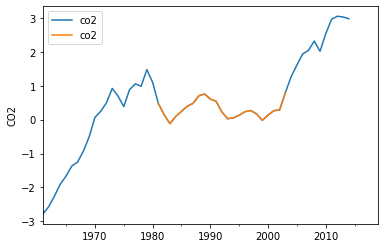

In [18]:
#leave
ax = co2.plot()
plt.ylabel("CO2"); 
co2.loc[
     (co2.index.year > 1980) & (co2.index.year <= 2003)].plot(ax=ax);

**Figure 2:** This is a plot of the *standardized* CO2 emissions in metric tons per capita of the globe from 1961 to 2019. The total emissions has risen over time. The y-axis origin of this time series is the from 1960 to 2003. The orange-highlighted range is the period between 1980 and 2003.

## Solar Irradiance

acquire the solar irradiance data from http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt.  Explore the data as you did for the CO2 dataset. Modify the dataframe so that it has year as the index (pd.data_frame() type) and "[W/m^2]" is the only column, which you should rename "irradiance". Each year shoud have a single entry, the mean for that year, which you can obtain with the method DataFrame.groupby() and the .mean() method applied to the groupby object as 

```sIr.groupby("Year").mean()```

In [19]:
sIr = pd.read_table('http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt', skiprows=6, sep=' ')
sIr.columns

Index([';', 'Year', 'Unnamed: 2', 'Unnamed: 3', 'TSI', '[W/m^2]'], dtype='object')

In [20]:
sIr.describe()

,;,Year,Unnamed: 2,Unnamed: 3,TSI,[W/m^2]
count,404.000000,0.0,0.0,0.0,0.0,404.000000
mean,1812.000000,NaN,NaN,NaN,NaN,1360.543793
std,116.769003,NaN,NaN,NaN,NaN,0.464534
min,1610.500000,NaN,NaN,NaN,NaN,1359.865500
25%,1711.250000,NaN,NaN,NaN,NaN,1360.191125
50%,1812.000000,NaN,NaN,NaN,NaN,1360.471800
75%,1912.750000,NaN,NaN,NaN,NaN,1360.821275
max,2013.500000,NaN,NaN,NaN,NaN,1362.142500


In [21]:
sIr.head()

,;,Year,Unnamed: 2,Unnamed: 3,TSI,[W/m^2]
0,1610.5,NaN,NaN,NaN,NaN,1359.8655
1,1611.5,NaN,NaN,NaN,NaN,1360.2017
2,1612.5,NaN,NaN,NaN,NaN,1360.4352
3,1613.5,NaN,NaN,NaN,NaN,1360.7561
4,1614.5,NaN,NaN,NaN,NaN,1360.9097


In [22]:
sIr.index = (sIr[';'] - 0.5).astype(int).values
sIr = sIr[['[W/m^2]']]
sIr.rename(columns={'[W/m^2]':'irradiance'}, inplace=True)
sIr.head()

,irradiance
1610,1359.8655
1611,1360.2017
1612,1360.4352
1613,1360.7561
1614,1360.9097


Standardize the data by the value **strting in 1960**. (subtract by the mean and divide by the standard deviation)


In [0]:
sIr.irradiance = (sIr.irradiance - sIr.iloc[1960-1610:, 0].mean()) / sIr.iloc[1960-1610:, 0].std()

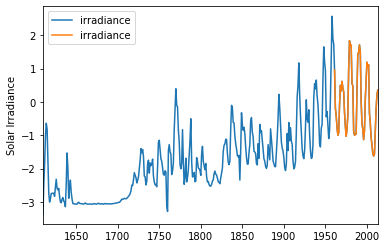

In [24]:
#leave
ax = sIr.plot()
ax = sIr[sIr.index>1960].plot(ax=ax);
plt.ylabel("Solar Irradiance");

**Figure 3:** This is a plot of the *standardized* irradiance levels from 1610 to 2013. The y-axis origin of this time series is the mean from 1960 to 2003. The orange-highlighted range is the period after 1960.

# Global Temperature Anomaly

acquire the global anomaly (temperature difference) data which I save in the MLTSA_FBianco/HW4 repository as "GLB.Ts%2BdSST.csv"(never say that I am not nice!!)

This required some tricks to set the years as index due to missing values. the soution is in the repository README but I encourage you to figure out how to do it yourself (maybe in a single line of code!)


In [25]:
gt = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/HW4/GLB.Ts%2BdSST.csv', skiprows=1, dtype='a').set_index('Year').iloc[:-1]
gt.index = pd.to_datetime(gt.index)
gt.drop(columns = gt.columns[-6:], inplace=True)
gt['Anomaly'] = gt.astype(float).mean(axis=1)
gt = gt[['Anomaly']]
gt.Anomaly = (gt.Anomaly - gt.iloc[1960 - 1880:2004 - 1880, 0].mean()) / gt.iloc[1960 - 1880:2004 - 1880, 0].std() 
gt.head()

,Anomaly
Year,
1880-01-01,-1.759174
1881-01-01,-1.362212
1882-01-01,-1.404199
1883-01-01,-1.778258
1884-01-01,-2.247741


Standardize the anomaly data between 1960 and 2003

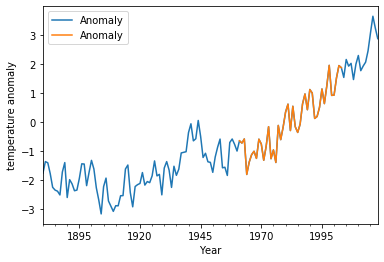

In [26]:
#gt.Anomaly = (gt.Anomaly - gt.Anomaly.mean()) / gt.Anomaly.std()
ax = gt.plot()
gt[(gt.index.year > 1960) & (gt.index.year <= 2003)].plot(ax=ax)
plt.ylabel("temperature anomaly");

**Figure 4:** This is a plot of the *standardized* Anomaly levels from 1880 to 2018. The total anomaly level has risen over time. The y-axis origin of this time series is the mean from 1960 to 2003. The orange-highlighted range is the period from 1960 to 2003.

Merge all dataframes using the index for all of them as merging column, You can do this in a single command concatenating merge() methods (like in the first homework).

In [0]:
sIr.index = pd.to_datetime(sIr.index.astype(str), format='%Y', errors='coerce').values

In [28]:
climate = pd.merge(co2, sIr, left_index=True, right_index=True)
climate = climate.merge(gt, left_index=True, right_index=True)
climate.head()

,co2,irradiance,Anomaly
1961-01-01,-2.78421,0.959137,-0.644628
1962-01-01,-2.57015,-0.182616,-0.724784
1963-01-01,-2.25587,-0.421219,-0.583557
1964-01-01,-1.90503,-0.779774,-1.804977
1965-01-01,-1.66764,-0.999902,-1.385114


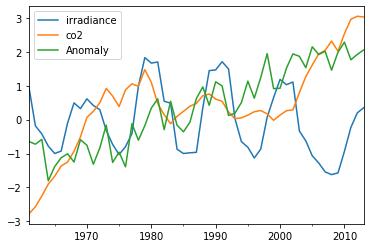

In [29]:
climate[["irradiance", "co2", "Anomaly"]].plot();

**Figure 5:** This is a plot of the *standardized* irradiance, co2 emissions, and  levels from 1880 to 2018. The y-axis origin of this time series is the mean from 1960 to 2003.

In [0]:
climate.co2 = co2.astype(float)

In [31]:
climate.describe()

,co2,irradiance,Anomaly
count,53.000000,53.000000,53.000000
mean,0.430392,-0.032693,0.379895
std,1.298045,0.980003,1.173208
min,-2.784207,-1.622819,-1.804977
25%,0.066295,-0.871884,-0.606459
50%,0.386241,-0.182616,0.424114
75%,0.986300,0.615414,1.462320
max,3.054747,1.833407,2.290595


# modeling
 import pydlm to create models of the global temperature anomaly.

 ## Model 1: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period which correspond to the 11-years solar cycles https://en.wikipedia.org/wiki/Solar_cycle
 

 ## Model 2: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period 
 - a regression on CO2, 
 
 
 ## Model 3
remove the regressor on the solar irradiance and see if the model is as good (i.e. does the 11 years cyle takes care of solar irradiance?) (e.g. you can check the MSE as ```model.getMSE()```


You can follow the examples here 
https://pydlm.github.io/example1.html#dynamic-linear-regression


In [74]:
climate.iloc[:, :2].values.shape

(53, 2)

In [0]:
# model 1
# A linear trend
linear_trend = trend(degree=2, discount=0.95, name='trend', w=4)
# A seasonality
seasonal11 = seasonality(period=11, discount=0.99, name='seasonal11', w=10)
# Build a simple dlm
simple_dlm = dlm(climate.Anomaly) + linear_trend + seasonal11

In [0]:
regressorCO2 = dynamic(features=climate.iloc[:, 0:1].values, discount=1.0, name='regressorCO2', w=10)
regressorIR = dynamic(features=climate.iloc[:, 1:2].values, discount=1.0, name='regressorIR', w=10)
regressed_dlm = dlm(climate.Anomaly) + linear_trend + seasonal11 + regressorCO2 + regressorIR

In [0]:
regressed_dlm_noir = dlm(climate.Anomaly) + linear_trend + seasonal11 + regressorCO2

In [81]:
# Fit  model 1
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


In [82]:
# Fit  model 2
regressed_dlm.fit()
# Plot the fitted results
regressed_dlm.turnOff('data points')

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [83]:
# Fit  model 3
regressed_dlm_noir.fit()
# Plot the fitted results
regressed_dlm_noir.turnOff('data points')

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


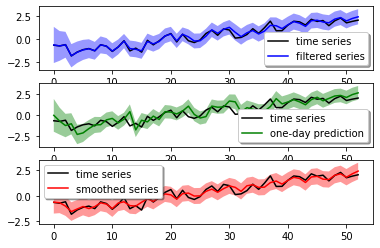

In [84]:
simple_dlm.plot()

**Figure 6:** This figure shows the time series, with the model's filtered series, one-day predicition, and smoothed series overlayed. This model uses a linear trend and a seasonal trend.

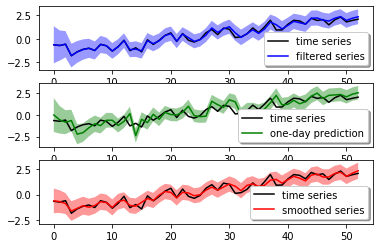

In [85]:
regressed_dlm.plot()

**Figure 7:** This figure shows the time series, with the model's filtered series, one-day predicition, and smoothed series overlayed. This model uses a linear trend, seasonal trend, regressor on the CO2 data, and a regressor on the irradiance data.

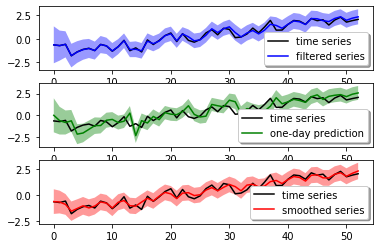

In [86]:
regressed_dlm_noir.plot()

**Figure 8:** This figure shows the time series, with the model's filtered series, one-day predicition, and smoothed series overlayed. This model uses a linear trend, a seasonal trend, and a regressor on the CO2 data.

NOTE: you can probably do a much better job than I did!

In [87]:
print('MSE Model fit:' + \
      '\nsimple:\t\t\t\t\t\t\t{:.2f}'.format(simple_dlm.getMSE()),
      '\nseasonality and CO2 + solar irradiance regression:\t{:.2f}'.format(regressed_dlm.getMSE()),
      '\nseasonality and CO2 regression:\t\t\t\t{:.2f}'.format(regressed_dlm_noir.getMSE()))

MSE Model fit:
simple:							0.38 
seasonality and CO2 + solar irradiance regression:	0.42 
seasonality and CO2 regression:				0.41


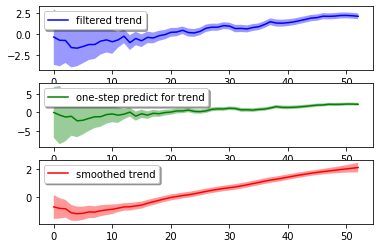

In [88]:
simple_dlm.plot('trend')

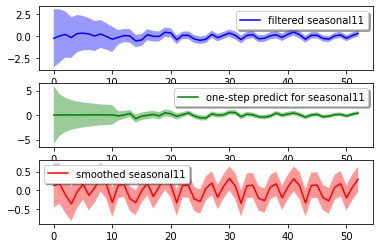

In [89]:
simple_dlm.plot('seasonal11')

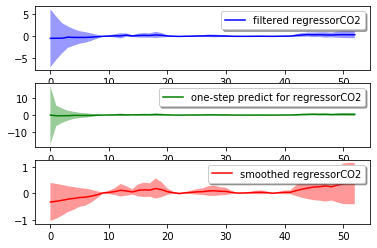

In [90]:
regressed_dlm.plot('regressorCO2')

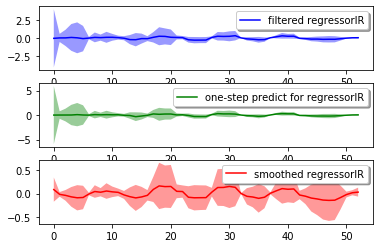

In [91]:
regressed_dlm.plot('regressorIR')


for one or more of your models plot the residuals and discuss them following the examples here 
https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/SARIMAXDiagnostics_financialTS.ipynb

**I am leaving the code here, but do discuss the plots in captions!!!**


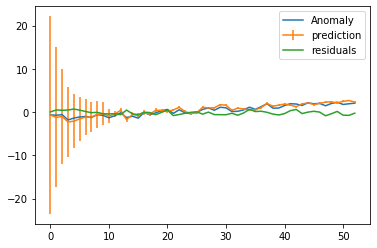

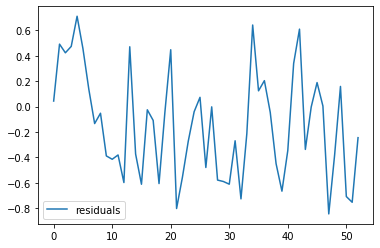

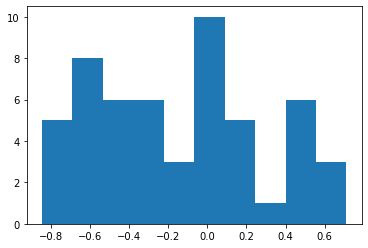

In [97]:
pred = [np.array(simple_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly))]
err = [np.array(simple_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly))]
plt.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
plt.errorbar(range(len(climate.Anomaly)), pred, yerr=err, label="prediction")

resids = (climate.Anomaly.values - pred)
plt.errorbar(range(len(climate.Anomaly)), resids,  label="residuals")
plt.legend()

plt.figure()
plt.errorbar(range(len(climate.Anomaly)), resids,  label="residuals")
plt.legend();
plt.figure();
plt.hist(resids);



**Figure 9:** These figures show the performance of the simple model. The first figure plots the predictions of the model (as well as its error) for each element in the series. The errorbars start out large, and then the model gains more confidence in its predictions as it gains more points. The second figure is a plot of the residuals. They are roughly centered around zero and less than 1. The final figure is a historgam of the residuals. The largest bin is the one that contains zero. This is another representation of the second figure.

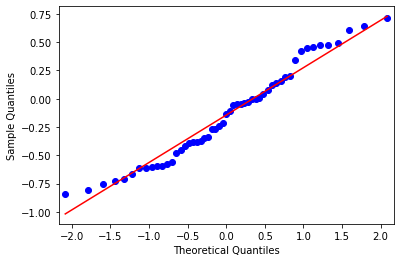

In [96]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(resids, line='s')
pyplot.show()

**Figure 10:** This is a QQ chart that plots the theoretical quantities against the sample quantities. If all the points were aligned on the red $y=x$ line, then our model would be prefect. Our plot shows values on the extremes lying further away from the line, and points closer to zero lying closer to the line. This means our model is good in deneral, but not as accurate in predicting outliers.

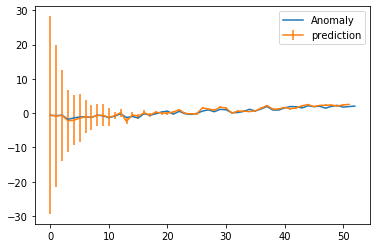

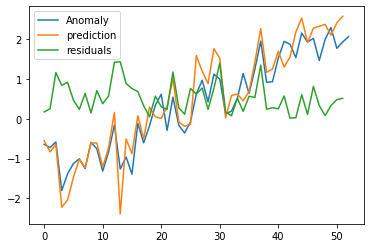

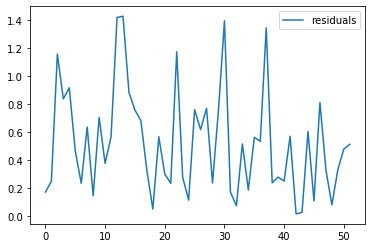

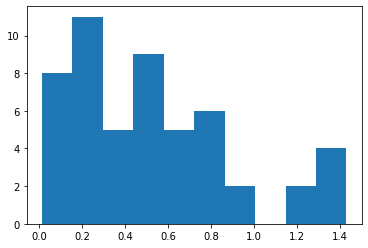

In [99]:
pred = [np.array(regressed_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly)-1)]
err = [np.array(regressed_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly)-1)]
plt.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
plt.errorbar(range(len(climate.Anomaly)-1), pred, yerr=err, label="prediction")
plt.legend()

plt.figure()
plt.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
plt.errorbar(range(len(climate.Anomaly)-1), pred, label="prediction")

resids = np.abs(climate.Anomaly.values[1:] - pred)
plt.errorbar(range(len(climate.Anomaly)-1), resids,  label="residuals")
plt.legend()

plt.figure()
plt.errorbar(range(len(climate.Anomaly)-1), resids,  label="residuals")
plt.legend()
plt.figure()
plt.hist(resids);


**Figure 11:** These figures show the performance of the regressor (CO2 + IR) model. The first figure plots the predictions of the model (as well as its error) for each element in the series. The errorbars start out large, and then the model gains more confidence in its predictions as it gains more points. The second plot shows the standardized values of the CO2 emissions, irradiance, and anomaly levels. The third figure is a plot of the residuals. They are roughly centered around zero and less than 1. The final figure is a historgam of the residuals. The largest bin is the one that contains zero. This is another representation of the second figure.

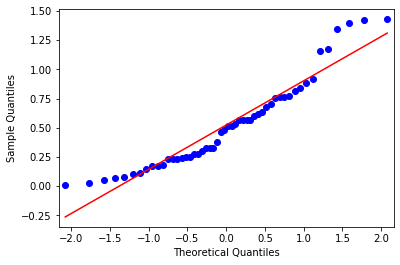

In [100]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(resids, line='s')
pyplot.show()

**Figure 12:** This is a QQ chart that plots the theoretical quantities against the sample quantities. If all the points were aligned on the red $y=x$ line, then our model would be prefect. Our plot shows values on the extremes lying further away from the line, and points closer to zero lying closer to the line. This means our model is good in deneral, but not as accurate in predicting outliers.

In [103]:
seed(1)
# generate univariate observations
# normality test
stat, p = shapiro(resids)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.916, p=0.001
Sample does not look Gaussian (reject H0)
